# 고객 데이터 분석


In [40]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
import matplotlib
from matplotlib import font_manager, rc

In [4]:
df = pd.read_csv('./Data/bank-additional-full.csv', engine='python', sep=';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 데이터 탐색

In [6]:
df.shape

(41188, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
# 카테코리성 컬럼 확인
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [14]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [15]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [16]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

### 데이터 분석 1 :
대출이 있는 사람이라면 은행 상품에 잘 가입하지 않을 것이다.  
- 가설 검증
- groupby 사용
- 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다
- 나뉜 데이터를 대출여부에 따라 나눈다
- 가입한 그룹 중 대출이 있는 사람의 비중과 가입하지 않은 그룹 중 대출이 있는 사람의 비중을 비교한다

In [20]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [21]:
# 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나누기
grouped = df.groupby('y')

In [22]:
yes_group = grouped.get_group('yes')
no_group = grouped.get_group('no')
yes_group.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [23]:
no_group.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
# 나눈 데이터(yes_group, no_group)를 대출여부(loan)에 따라 나눈다
yes = yes_group['loan'].value_counts()
yes

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

In [25]:
no = no_group['loan'].value_counts()
no

no         30100
yes         5565
unknown      883
Name: loan, dtype: int64

In [26]:
# 가입한 그룹 내 대출이 있는 사람 비중, 가입하지 않은 그룹 내 대출이 있는 사람 비중
# 비중 : 시리즈 변수 각각의 value를 시리즈의 총합으로 나눔
# 시리즈는 산술연산을 사용가능
# series/series.sum()
yes = yes/yes.sum()
yes

no         0.829741
yes        0.147198
unknown    0.023060
Name: loan, dtype: float64

In [27]:
no = no/no.sum()
no

no         0.823574
yes        0.152266
unknown    0.024160
Name: loan, dtype: float64

In [28]:
pd.concat([yes, no], axis=1)

,loan,loan
no,0.829741,0.823574
yes,0.147198,0.152266
unknown,0.023060,0.024160


In [29]:
yes.name='y_yes'
no.name='y_no'

In [30]:
pd.concat([yes,no],axis=1)

,y_yes,y_no
no,0.829741,0.823574
yes,0.147198,0.152266
unknown,0.023060,0.024160


### 같은 상품을 새로운 고객에게 마케팅 하려고 한다.
연령과 상품가입여부, 직업을 함께 고려할 때 마케팅 전략을 변화시켜야 할 그룹은?

- 가설 검증
- pivot_table 활용
- 분석 조건 : 세개의 컬럼(age, job, y)을 함께 분석
- pd.pivot_table('데이터프레임 변수', values=집계대상(수치데이터), index=행 인덱스가 될 컬럼명, columns=열 인덱스가 될 컬럼명, aggfunc=집합함수)

In [31]:
pd.pivot_table(df, values='age', index='y', columns='job',aggfunc='mean')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


In [32]:
pd.pivot_table(df,'age','y','job',aggfunc='mean')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


In [33]:
pd.pivot_table(df,'age', ['y', 'marital'], 'job', aggfunc='mean')

job              admin.  blue-collar  entrepreneur  housemaid  management  \
y   marital                                                                 
no  divorced  43.098432    42.903704     44.042424  48.806897   46.123288   
    married   40.148663    40.857804     42.477111  44.849218   43.634997   
    single    33.858265    33.409255     35.472527  38.087379   34.070776   
    unknown   34.666667    42.818182     35.500000  40.000000   51.000000   
yes divorced  44.878788    42.037736     44.857143  57.000000   46.692308   
    married   41.386503    41.363420     43.090909  54.256757   44.756637   
    single    32.404594    32.652174     35.666667  40.875000   33.285714   
    unknown   42.500000    37.000000     31.000000        NaN         NaN   

job             retired  self-employed   services    student  technician  \
y   marital                                                                
no  divorced  61.480469      42.871795  41.991984  34.500000   42.173484   
    married   60.019048      42.349148  39.992951  30.484848   40.686245   
    single    53.938272      33.783537  32.159921  26.062500   33.950697   
    unknown   59.750000      39.400000  40.000000  30.000000   33.300000   
yes divorced  72.739130      41.875000  43.484848  35.666667   40.738462   
    married   67.033435      41.036585  38.379518  31.250000   41.398438   
    single    67.500000      31.921569  31.024194  24.481061   32.078853   
    unknown   66.000000            NaN        NaN        NaN   30.000000   

job           unemployed    unknown  
y   marital                          
no  divorced   42.140351  43.300000  
    married    41.636861  47.532110  
    single     33.536946  38.288136  
    unknown    47.200000  40.166667  
yes divorced   47.900000  76.333333  
    married    41.941860  58.750000  
    single     32.062500  30.000000  
    unknown          NaN  40.666667

In [34]:
## 같은 상품을 새로운 고객에게 마케팅하려고 한다 
# 연령과 상품가입여부, 직업을 함께 고려할 때 마케팅 전략을 변화시켜야 할 그룹은? 

In [35]:
pivot = pd.pivot_table(df, values='age', index='y', columns='job', aggfunc='mean')
pivot

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


In [36]:
pivot.loc['yes'] - pivot.loc['no']

job
admin.          -0.250911
blue-collar     -0.381430
entrepreneur     0.232030
housemaid        7.945493
management       0.473829
retired          8.327329
self-employed   -2.170175
services        -2.012836
student         -1.596667
technician      -0.853458
unemployed      -0.782328
unknown          1.678627
dtype: float64

In [37]:
pivot.loc['diff'] = pivot.loc['yes'] - pivot.loc['no']
pivot

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054
diff,-0.250911,-0.381430,0.232030,7.945493,0.473829,8.327329,-2.170175,-2.012836,-1.596667,-0.853458,-0.782328,1.678627


In [38]:
result = pivot.sort_values('diff', axis=1, ascending=False)
result 

job,retired,housemaid,unknown,management,entrepreneur,admin.,blue-collar,unemployed,technician,student,services,self-employed
y,,,,,,,,,,,,
no,59.926128,44.705451,45.375427,42.309707,41.703453,38.219846,39.582057,39.844828,38.600033,26.396667,38.090236,40.176887
yes,68.253456,52.650943,47.054054,42.783537,41.935484,37.968935,39.200627,39.062500,37.746575,24.800000,36.077399,38.006711
diff,8.327329,7.945493,1.678627,0.473829,0.232030,-0.250911,-0.381430,-0.782328,-0.853458,-1.596667,-2.012836,-2.170175


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

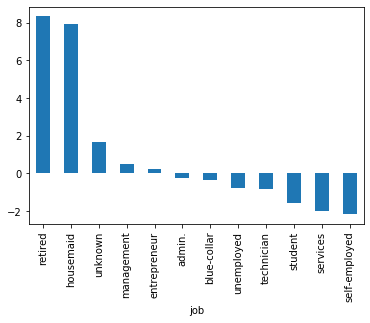

In [45]:
result.loc['diff'].plot.bar()
plt.show()